# plots for the pp-c.m. paper

In [1]:
import sys ; sys.path.insert(0, '../')
from notebook_tools import *
from scipy import optimize
import matplotlib.mlab as mlab
import matplotlib.patches as patches
%matplotlib inline

# Fig. 1: the distributions

In [2]:
targets = ['C12','Al27','Fe56','Pb208']
colors = ['red','blue','purple','black']
target_names = ['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb'] 

In [3]:
columns = ['Pmiss3Mag','pcmX','pcmY','pcmZ','rooWeight'] 
root_fname , data_allPmiss_PrecFid , ana = dict() , dict() , dict()
for target in targets:
    root_fname[target] = path+"/OrAnalysisTrees/AdjustedTrees/SRC_e2p_adjusted_300Pmiss600_%s_PrecFiducials.root"%target
    data_allPmiss_PrecFid[target] = read_root( root_fname[target] , columns=columns )
    ana[target] = data_allPmiss_PrecFid[target][data_allPmiss_PrecFid[target]['Pmiss3Mag']<0.6]

columns = ['Q2' , 'Xb' , 'p/q' ,'theta (pq)' , 'Mmiss' ,'Pmiss3Mag','pcmX','pcmY','pcmZ' , 'rooWeight' ,
          'theta (rec-q)' , 'OpeningAngle']
targets = ['C12','Al27','Fe56','Pb208']
colors = ['red','blue','purple','black']
target_names = ['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb'] 
ana = dict()
for target in targets:
    ana[target] = read_root( "/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_ppSRCcut_DATA_%s.root"%target , key='anaTree' , columns=columns  )

In [4]:
def gauss_func(x, C , mean, sigma):
    return C/np.sqrt(2*np.pi*sigma)*np.exp( -np.square(x-mean)/(2*np.square(sigma)) )

In [5]:
# results from Analysis_alaHalla_different_targets_bands.ipynb 
# Aug 9, 2017
AccCorr = pd.DataFrame({'A':[12 , 27 , 56 , 208],
                        
                        's_t_measured':[159,172,181,176],
                        's_t_measured_Err':[5,9,6,13],

                        's_t_corrected':[143,155,159,157],
                        's_t_corrected_Err':[6,11,7,16],
                       
                        's_x_measured':[157,180,178,195],
                        's_x_measured_Err':[7,14,7,21],

                        's_x_corrected':[141,162,156,173],
                        's_x_corrected_Err':[7,15,9,22],
                        
                        's_y_measured':[160,166,185,163],
                        's_y_measured_Err':[7,13,9,17],

                        's_y_corrected':[146,150,163,148],
                        's_y_corrected_Err':[7,13,9,18],


                        's_t_final':[143,155,159,157],
                        's_t_final_Err':[6,11,7,16]}

                       ,index = target_names)
AccCorr

,A,s_t_corrected,s_t_corrected_Err,s_t_final,s_t_final_Err,s_t_measured,s_t_measured_Err,s_x_corrected,s_x_corrected_Err,s_x_measured,s_x_measured_Err,s_y_corrected,s_y_corrected_Err,s_y_measured,s_y_measured_Err
$^{12}$C,12,143,6,143,6,159,5,141,7,157,7,146,7,160,7
$^{27}$Al,27,155,11,155,11,172,9,162,15,180,14,150,13,166,13
$^{56}$Fe,56,159,7,159,7,181,6,156,9,178,7,163,9,185,9
$^{208}$Pb,208,157,16,157,16,176,13,173,22,195,21,148,18,163,17


## $x$ and $y$ together

saved /Users/erezcohen/Desktop/Projects/2NSRC/ppCMpaper/Figures/pcm_alltargets_nocolors_xy_text_sigma_xy.png


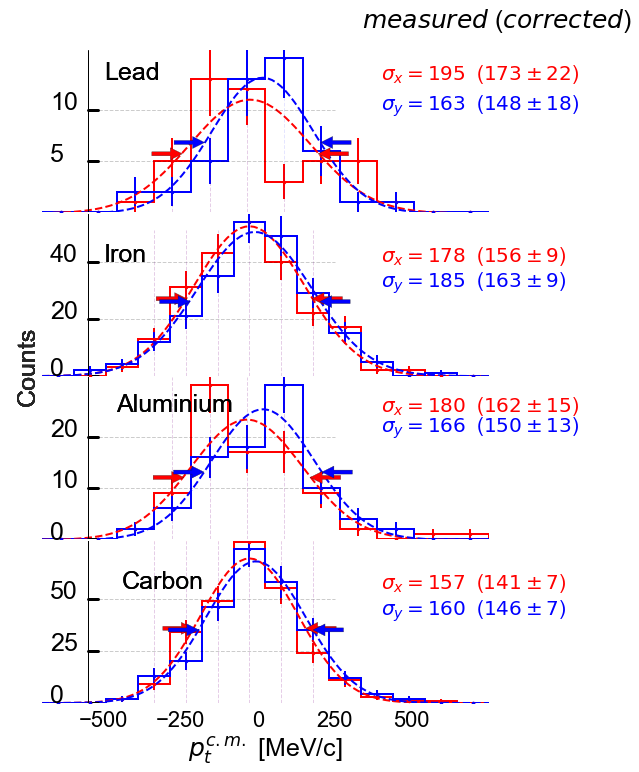

In [9]:
# make p(c.m.) in a nice style using also keyone
# xmin , xmax  = -600,650
xmin , xmax  = -700,750

x_target_text = [-440,-460,-500,-500]
figsize=(8,12)
fontsize = 25# 35
gauscolor = 'red'
label_option=  'text_sigma_xy' #'text_sigma_xyt' #'text_sigma_t' # 
text_sigma_color = 'black' if 't' in label_option else 'red'
fig = plt.figure(figsize=figsize)
nbins = [15 , 13 , 15 , 13]
y_ticks_targets = [[0, 25, 50],[0, 10, 20],[0, 20, 40],[5, 10]]
y_text_sigma = np.array([[55,25,40,13],[42,21,31,10]])
y_text_sigma_t = [45,16,35,10]

for i,target,target_name,target_label,color,y_ticks in zip(range(4)
                                              ,targets
                                              ,target_names
                                              ,['Carbon','Aluminium','Iron','Lead']
                                              ,['black','black','black','black'],y_ticks_targets):
    bins = np.linspace(xmin , xmax , nbins[i] )

    x_label = '$p^{c.m.}_{t}$ [MeV/c]' if target is 'C12' else '' # = (p^{c.m.}_{x}+p^{c.m.}_{y})/2

    for i_dir,(var,dir_name,dir_color) in enumerate(zip(['pcmX','pcmY'],['x','y'],['red','blue'])):
        x = 1000*ana[target][var]
        ax = fig.add_subplot(4,1,4-i)
        h,bins,_=plt.hist(x,bins=bins,histtype='step',linewidth=2,color=dir_color);
        mid = bins[0:-1] + 0.5*(bins[1]-bins[0])
        plt.errorbar( mid , y=h , yerr=np.sqrt(h) , fmt='.',linewidth=2 , color=dir_color, ecolor=dir_color);
        C = np.max(h)

        mean, sigma = np.mean(x), np.std(x)
        x_gaus = np.linspace(np.min(bins),np.max(bins),100)
        norm_fact = len(x)*(bins[1]-bins[0])
        y_gaus = norm_fact*mlab.normpdf(x_gaus, mean, sigma)
        y_sigma = 0.5*np.max(y_gaus)
        plt.plot(x_gaus,y_gaus-0.1,'--',color=dir_color,linewidth=2);
        ymax = 1.05*np.max(h)
        ax.set_ylim(0,ymax)
        if i==0: plt.axhspan(xmin=-1,xmax=1,ymin=0,ymax=0,linewidth=3)
        else:
            ax.xaxis.set_major_formatter( NullFormatter() )
            ax.set_axis_off()
        plt.text(x_target_text[i] , y_text_sigma[0][i] , target_label , color=color , fontsize=fontsize)
        ax.set_xlim(xmin , xmax)
        plt.xticks(np.linspace(xmin + 200 , xmax - 200 , 5))
        set_axes(ax,x_label=x_label,fontsize=fontsize)
        plt.subplots_adjust(hspace=0.01)
        # add grid lines
        for j,tick in zip(range(len(mid)),mid):
            if j < 3 or j > nbins[i]-7: continue 
            if i==2  :  y_max = 0.9*ymax 
            elif i==3:  y_max = h[j]
            else: y_max = ymax
            line = plt.Line2D([tick,tick],[0,y_max],linewidth=1,linestyle='--',color=dir_color,alpha=0.1)
            ax.add_artist(line)

    
        # add x-axis to the bottom subplot (12C)
        if i==0:
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('none')
            ax.tick_params(labeltop='off', labelleft='off')
            customaxis(ax,c_left='none',c_bottom='none')
        # add vertical axes
        x_yaxis = -550 # xmin + 167.5*(xmax-xmin)*(1-0.2*i*0)
        line = plt.Line2D([x_yaxis,x_yaxis],[0,ymax],linewidth=1,linestyle='-',color=color)
        ax.add_artist(line)

        if i_dir==0:
            for y_tick in y_ticks: 
                ax.text(x_yaxis-125,y_tick+0.0025*y_max,'%d'%y_tick,fontsize=fontsize,color=color)
                line = plt.Line2D([x_yaxis,-x_yaxis-300],[y_tick,y_tick],linewidth=1,linestyle='--',color=color,alpha=0.2)
                ax.add_artist(line)
                # and add ticks
                line = plt.Line2D([x_yaxis,x_yaxis+30],[y_tick,y_tick],linewidth=3,linestyle='-',color=color,alpha=1)
                ax.add_artist(line)


        x_text = xmax - 350 # mean+sigma+110
        if target is 'Pb208' and i_dir==0: plt.text( x_text-60 , y_text_sigma[i_dir][i]+5,r'$measured$ ($corrected$)',color=text_sigma_color,fontsize=25)
            
        # add sigma lines and text
        if label_option=='text_sigma_xy':
            sigma = float(AccCorr[AccCorr.index==target_name]['s_'+dir_name+'_measured'])
            s_t_final , s_t_final_Err = float(AccCorr[AccCorr.index==target_name]['s_'+dir_name+'_corrected']),float(AccCorr[AccCorr.index==target_name]['s_'+dir_name+'_corrected_Err'])
            plt.text(x_text, y_text_sigma[i_dir][i],r'$\sigma_{'+dir_name+'}=%.0f $  ($%.0f \pm %.0f $)'%(sigma , s_t_final , s_t_final_Err),color=dir_color,fontsize=fontsize-5)
            ax.annotate('', xy=(mean+sigma+20, 1.03*y_sigma), xytext=(mean+sigma+130, 1.03*y_sigma),arrowprops=dict(facecolor=dir_color, shrink=0.05))
            ax.annotate('', xy=(mean-sigma-20, 1.03*y_sigma), xytext=(mean-sigma-130, 1.03*y_sigma),arrowprops=dict(facecolor=dir_color, shrink=0.05))

        elif label_option=='text_sigma_t' and i_dir==0:
            sigma = float(AccCorr[AccCorr.index==target_name]['s_t_measured'])
            s_t_final , s_t_final_Err = float(AccCorr[AccCorr.index==target_name]['s_t_corrected']),float(AccCorr[AccCorr.index==target_name]['s_t_corrected_Err'])
            plt.text(x_text, y_text_sigma[i_dir][i],r'$\sigma_{t}=%.0f $  ($%.0f \pm %.0f $)'%(sigma , s_t_final , s_t_final_Err),color=text_sigma_color,fontsize=fontsize-5)

        elif label_option=='text_sigma_xyt':
            sigma = float(AccCorr[AccCorr.index==target_name]['s_'+dir_name+'_measured'])
            s_t_final , s_t_final_Err = float(AccCorr[AccCorr.index==target_name]['s_'+dir_name+'_corrected']),float(AccCorr[AccCorr.index==target_name]['s_'+dir_name+'_corrected_Err'])
            plt.text(x_text, y_text_sigma[i_dir][i],r'$\sigma_{'+dir_name+'}=%.0f $  ($%.0f \pm %.0f $)'%(sigma , s_t_final , s_t_final_Err),color=dir_color,fontsize=fontsize-5)
            if i_dir==0:
                sigma = float(AccCorr[AccCorr.index==target_name]['s_t_measured'])
                s_t_final , s_t_final_Err = float(AccCorr[AccCorr.index==target_name]['s_t_corrected']),float(AccCorr[AccCorr.index==target_name]['s_t_corrected_Err'])
                plt.text(x_text, y_text_sigma_t[i],r'$\sigma_{t}=%.0f $  ($%.0f \pm %.0f $)'%(sigma , s_t_final , s_t_final_Err),color=text_sigma_color,fontsize=fontsize-5)

        plt.xticks([-500, -250, 0, 250, 500],fontsize=fontsize-3)
        plt.figtext(0.08,0.54,"Counts",fontdict={'fontsize':fontsize},rotation=90)

filename = '/Users/erezcohen/Desktop/Projects/2NSRC/ppCMpaper/Figures/pcm_alltargets_nocolors_xy'+'_'+label_option+'.png'
print 'saved',filename
plt.savefig(filename,transparent=True,tight_layout=True,bbox_inches='tight') 

# Fig 2: $\sigma$ vs. A

In [8]:
nominal_results = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/final_results/nominal_results.csv')
nominal_results['A']=[12,27,56,208]
nominal_results

,Unnamed: 0,target,sigma_x_before_acc_corr,sigma_x_before_acc_corr_err,sigma_x_final,sigma_x_final_up_err,sigma_x_final_dw_err,sigma_y_before_acc_corr,sigma_y_before_acc_corr_err,sigma_y_final,...,sigma_y_final_dw_err,sigma_t_before_acc_corr,sigma_t_before_acc_corr_err,sigma_t_final,sigma_t_final_err_sys,sigma_t_final_up_err_stat,sigma_t_final_dw_err_stat,sigma_t_final_up_err_tot,sigma_t_final_dw_err_tot,A
0,0,$^{12}$C,0.157110,0.006865,0.141154,0.006727,0.006931,0.160396,0.007007,0.145580,...,0.006991,0.158720,0.004904,0.143315,0.003527,0.004158,0.004158,0.005453,0.005516,12
1,1,$^{27}$Al,0.180235,0.013666,0.161716,0.014522,0.014462,0.165708,0.012570,0.150000,...,0.012582,0.172366,0.009252,0.155131,0.006954,0.008345,0.008345,0.010863,0.010685,27
2,2,$^{56}$Fe,0.177601,0.008388,0.155587,0.008732,0.008627,0.184577,0.008706,0.162558,...,0.009195,0.180959,0.006040,0.158777,0.005362,0.005285,0.005285,0.007529,0.007351,56
3,3,$^{208}$Pb,0.195017,0.020634,0.172636,0.022748,0.021623,0.163082,0.017300,0.147783,...,0.017620,0.176265,0.013257,0.157442,0.011272,0.011589,0.011589,0.016167,0.015880,208


In [9]:
cm_parameters = dict()
cm_parameters_with_correction = dict()
for Fiducials in ["NoPrecFiducials","PrecFiducials"]:
    cm_pars = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/300Pmiss600/alltargets_'+Fiducials+'_dataCMparameters.csv')
    cm_pars['sigma_x_before_acc_corr'] = np.sqrt(np.square(cm_pars['sigma_x_unweighted']) - np.square(0.02))
    cm_pars['sigma_x_before_acc_corr_err'] = cm_pars['sigma_xErr_unweighted']
    cm_pars['sigma_y_before_acc_corr'] = np.sqrt(np.square(cm_pars['sigma_y_unweighted']) - np.square(0.02))
    cm_pars['sigma_y_before_acc_corr_err'] = cm_pars['sigma_yErr_unweighted']
    
    
    # weighted average
    sigma_x, Dsigma_x = cm_pars['sigma_x_before_acc_corr'], cm_pars['sigma_x_before_acc_corr_err']
    sigma_y, Dsigma_y = cm_pars['sigma_y_before_acc_corr'], cm_pars['sigma_y_before_acc_corr_err']
    sigma_t = (sigma_x/np.square(Dsigma_x)+sigma_y/np.square(Dsigma_y))/( 1./np.square(Dsigma_x) + 1./np.square(Dsigma_y))
    cm_pars['sigma_t_before_acc_corr'] = sigma_t    
    Dsigma_t = np.sqrt(1./( 1./np.square(Dsigma_x) + 1./np.square(Dsigma_y) ))
    cm_pars['sigma_t_before_acc_corr_err'] = Dsigma_t
    cm_parameters[Fiducials] = cm_pars
    cm_parameters_with_correction[Fiducials] = cm_pars
cm_parameters[Fiducials]

,Nevts,chi2red_x_unweighted,chi2red_y_unweighted,chi2red_z_unweighted,mean_xErr_unweighted,mean_x_unweighted,mean_yErr_unweighted,mean_y_unweighted,mean_zErr_unweighted,mean_z_unweighted,...,sigma_zErr_unweighted,sigma_z_unweighted,target,A,sigma_x_before_acc_corr,sigma_x_before_acc_corr_err,sigma_y_before_acc_corr,sigma_y_before_acc_corr_err,sigma_t_before_acc_corr,sigma_t_before_acc_corr_err
0,266,0.602767,0.407306,2.139232,0.009711,-0.026697,0.009910,-0.005837,0.009028,0.106593,...,0.006384,0.147251,$^{12}$C,12,0.157110,0.006865,0.160396,0.007007,0.158720,0.004904
1,88,1.058674,0.542381,0.460758,0.019329,-0.035170,0.017791,0.017157,0.015036,0.118663,...,0.010629,0.141058,$^{27}$Al,27,0.180235,0.013666,0.165708,0.012570,0.172366,0.009252
2,227,0.471936,0.458693,1.598486,0.011862,-0.027254,0.012322,-0.009223,0.009999,0.149765,...,0.007069,0.150658,$^{56}$Fe,56,0.177601,0.008388,0.184577,0.008706,0.180959,0.006040
3,45,0.847317,0.596230,0.395723,0.029217,-0.024147,0.024489,0.016012,0.025269,0.177513,...,0.017832,0.169545,$^{208}$Pb,208,0.195017,0.020634,0.163082,0.017300,0.176265,0.013257


In [10]:
def plot_needed_for_A_depdendence_sigma_t(ax=None,figsize=(16,15),s=30,
                                          xlim=(2.5,250), ylim=(0,200), #79
                                          labels=dict({'$^4$He':(3.5,122),
                                                '$^{12}$C':(9,165),
                                                '$^{27}$Al':(21,182),
                                                '$^{56}$Fe':(45,185),
                                                '$^{208}$Pb':(140,184),                                               
                                                      }),
                                          fontsize=55,
                                          do_Ciofi=True):
    from scipy.interpolate import interp1d

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    # for all plots
    plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='allpairs',color='black' ,label='Colle et al., All pairs')
    plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' ,linestyle='-',color='black', vary='nl00',label='Colle et al., $^1S_0$ pairs')
    if do_Ciofi: ax.errorbar(CiofiCalc.A, CiofiCalc.s_t,markeredgecolor='black',marker='*',ms=30,mfc='none',linewidth=0, markeredgewidth=2,label='Ciofi and Simula')
    plot_data( data=BNL_Data, ax=ax, Ashift=1 , color='blue', marker='s', label=None )
    plot_data( data=HallA_Data, ax=ax, Ashift=-1 , color='blue' , marker='s' , label='Hall-A/BNL' )
    plot_data( data=Korover_Data , ax=ax, marker='s' , color='blue', label=None )
    
    ax.set_xscale('log')
    set_axes(ax , 'A' , '$\sigma_{c.m.}$ [GeV/c]' , fontsize=fontsize 
             ,xticks=[4,12,27,56,208]
             ,yticks=[100,125,150,175,200])
    ax.grid(b=True, which='major', color='b', linestyle='--',alpha=0.25)    
    if xlim is not None:    ax.set_xlim(xlim);
    if ylim is not None:    ax.set_ylim(ylim);
    # target name labels
    for label in list(labels.keys()):
        ax.text(labels[label][0],labels[label][1],label,fontsize=35)
    return ax

def plot_A_depdendence_sigma_t(data=None,
                               figsize=(16,15),s=30,fontsize=55,
                               xlim=(2.5,250), ylim=(79,200),  #79
                               do_save_fig=True, filename='corrected_sigma_t_with_calculations',
                               labels=dict({'$^4$He':(3.5,122), '$^{12}$C':(9,165), '$^{27}$Al':(21,182),
                                            '$^{56}$Fe':(45,185), '$^{208}$Pb':(140,184), }),
                               do_Ciofi=True,do_measured=True,
                               do_stat_uncertainties=False,do_sys_uncertainties=False,do_tot_uncertainties=True):
    
    fig,ax = plt.subplots(figsize=figsize)
    ax=plot_needed_for_A_depdendence_sigma_t(ax=ax,figsize=figsize,fontsize=fontsize,s=s,xlim=xlim, ylim=ylim,labels=labels,do_Ciofi=do_Ciofi)
    # measured
    if do_measured: ax.plot(cm_pars['A'], 1000*cm_pars['sigma_t_before_acc_corr'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='This work, no acceptance corr.')
    # corrected
    if do_tot_uncertainties:
        plot_data_assymetric( data=data, ax=ax, label='This work', markersize=20 ,color='red' , marker='o')
        
    # seperated statistical uncertainty
    if do_stat_uncertainties: 
        A,st,sterr = cm_pars['A'], 1000*data['sigma_t_final'], 1000*data['sigma_t_final_Err_stat']
        if do_tot_uncertainties:
            ax.errorbar(A,st,sterr ,ecolor='purple',elinewidth=2 , capsize=15, capthick=3 , linestyle='none'
                        ,linewidth=3, label='stat. uncertainties')
        else: 
            ax.errorbar(A,st,sterr ,ecolor='red',color='red', marker='o', markersize=20 ,elinewidth=2 , capsize=15, capthick=3 , linestyle='none'
                        ,linewidth=3, label='stat. uncertainties')

#     ax.legend(fontsize=25,loc='lower right')
    # add a band of systematical uncertaintes
    if do_sys_uncertainties:
        ax.fill_between(cm_pars['A']
                        , np.min(ax.get_ylim())
                        , np.min(ax.get_ylim()) + 1000*data['sigma_t_final_up_err_sys'] 
                        , color='purple' , alpha=0.5 ,  label='sys. uncertainties')
    ax.legend(fontsize=25,loc='upper left')

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


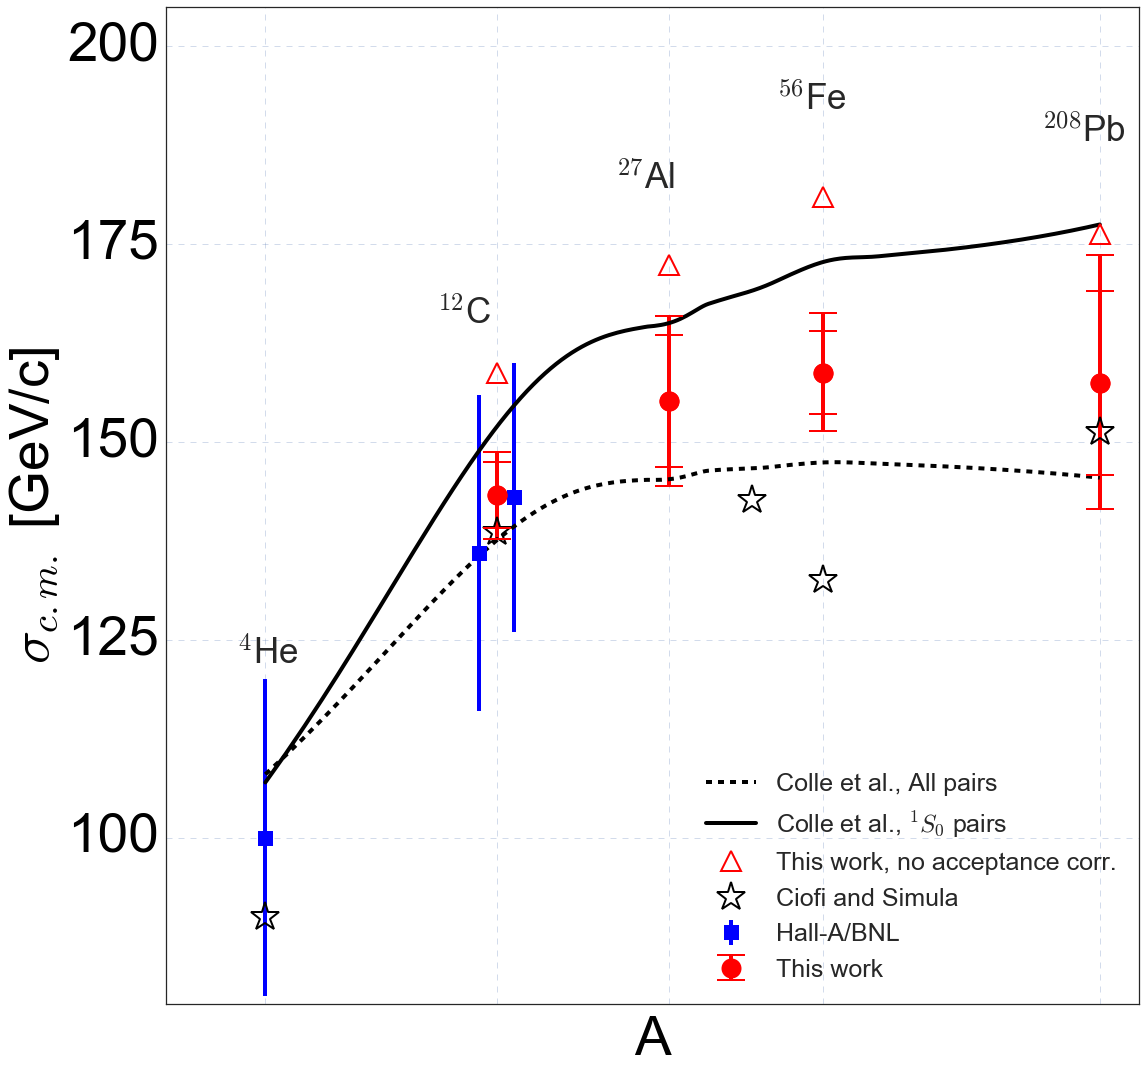

In [11]:
extraname=''
ax = plot_needed_for_A_depdendence_sigma_t(ylim=(79,205),labels=dict({'$^4$He':(3.5,122),
                                            '$^{12}$C':(9,165), '$^{27}$Al':(21,182),
                                            '$^{56}$Fe':(45,192), '$^{208}$Pb':(158,188), }),do_Ciofi=True)

plot_data_assymetric( data=nominal_results,direction='t',ax=ax, label="This work" , marker='o', markersize=20 , capthick=2, capsize=14 )
plt.legend(fontsize=20,loc='upper left')
# measured
ax.plot(cm_pars['A'], 1000*cm_pars['sigma_t_before_acc_corr'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='This work, no acceptance corr.')
plot_data_assymetric( data=nominal_results ,direction='t', unc_name='stat' , ax=ax , marker='o', markersize=20 , capthick=2 , capsize=14)

ax.legend(fontsize=25,loc='lower right')
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/Projects/2NSRC/ppCMpaper/Figures/sigma_vs_A.pdf')    

# Fig 3: $\sigma$ vs. $a_2$

In [12]:
sigma = np.array([0 , 100 , 141 , 159 , 157])
sigma_err = np.array([0 , 20 , 5 , 7 , 16])

sigma2 = np.square(sigma)
sigma2_err = 2*sigma*sigma_err

# // Fomin no c.m. corrections
a2 = np.array([1, 3.6 , 4.75 ,  5.21 , 5.16 ])
a2_err = np.array([0 , 0.1 , 0.16, 0.2, 0.22])

a2_He3 = np.array([1.97 ])
a2_He3_err = np.array([0.1])
sigma_He3 = np.array([68])
sigma_He3_err = np.array([10])

In [13]:
# a2_df = pd.DataFrame({'nucleus': ['D','He3','He4','Be9','C12','Cu63','Au197','Fe56']
#                       ,'$a_2$':[1.000,2.130,3.600,3.910,4.750,5.210,5.160,5.500]
#                       ,'$a_2^p$':[1.000,1.597,3.600,4.399,4.750,5.659,6.434,5.923]
#                       ,'$a_2^n$':[1.000,3.195,3.600,3.519,4.750,4.827,4.307,5.133]
#                      })

a2_df_onlyHe4 = pd.DataFrame({'nucleus': ['He4']
                      ,'$a_2$':[3.600]
                      ,'$a_2^p$':[3.600]
                      ,r'$\Delta a_2^p$':[0.100]            
                      ,r'$\sigma$ [MeV/c]':[100]
                      ,r'$\Delta \sigma$ [MeV/c]':[20]
                     })



a2_df_noD_noHe3 = pd.DataFrame({'nucleus': ['He4','C12','Fe56','Au197']
                      ,'$a_2$':[3.600,4.750,5.500,5.160]
                      ,'$a_2^p$':[3.600,4.750,5.923,6.434]
                      ,r'$\Delta a_2^p$':[0.100,0.160,0.528,0.274]
                      
                      ,r'$\sigma$ [MeV/c]':[100,141,159,157]
                      ,r'$\Delta \sigma$ [MeV/c]':[20,5,7,16]
                     })


a2_df = pd.DataFrame({'nucleus': ['D','He3','He4','C12','Fe56','Au197']
                      ,'$a_2$':[1.000,2.130,3.600,4.750,5.500,5.160]
                      ,'$a_2^p$':[1.000,1.597,3.600,4.750,5.923,6.434]
                      ,r'$\Delta a_2^p$':[0,0.030,0.100,0.160,0.528,0.274]
                      
                      ,r'$\sigma$ [MeV/c]':[0,68,100,141,159,157]
                      ,r'$\Delta \sigma$ [MeV/c]':[0,10,20,5,7,16]
                     })
a2_df

,$\Delta \sigma$ [MeV/c],$\Delta a_2^p$,$\sigma$ [MeV/c],$a_2$,$a_2^p$,nucleus
0,0,0.000,0,1.00,1.000,D
1,10,0.030,68,2.13,1.597,He3
2,20,0.100,100,3.60,3.600,He4
3,5,0.160,141,4.75,4.750,C12
4,7,0.528,159,5.50,5.923,Fe56
5,16,0.274,157,5.16,6.434,Au197


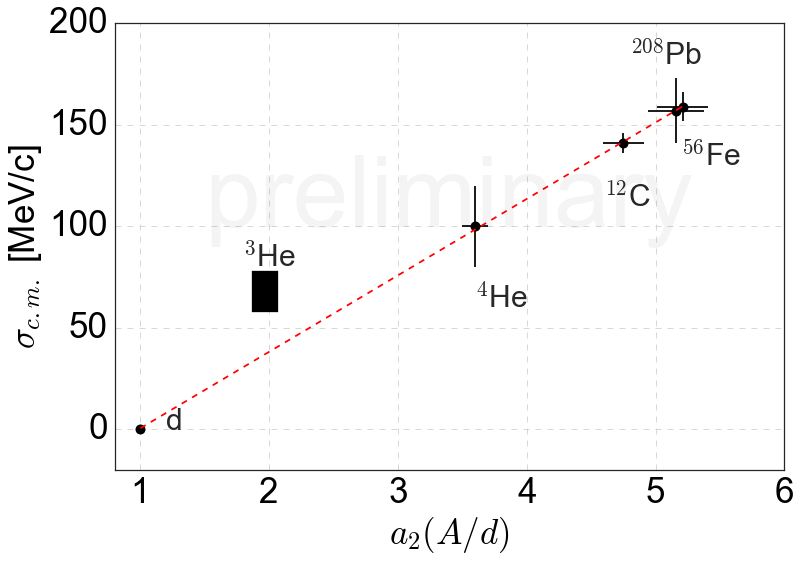

In [14]:
fig,ax=plt.subplots(figsize=(12,8))
plt.errorbar(a2,sigma,xerr=a2_err,yerr=sigma_err,fmt='o',color='black',markersize=10)#,label='data'
ax.add_patch(
    patches.Rectangle(
        (a2_He3-a2_He3_err, sigma_He3-sigma_He3_err),   # (x,y)
        a2_He3_err*2,          # width
        sigma_He3_err*2,          # height    
        color='black'
    )
)
p = np.poly1d(np.polyfit(x=a2,y=sigma,deg=1))
plt.plot(a2,p(a2),'--',color='red')
# plt.plot(ColleCalc['a2'],ColleCalc['allpairs'],'s',color='red',label='Colle, all pairs')
# plt.plot(ColleCalc['a2'],ColleCalc['nl00'],'v',color='black',label='Colle, n,l=0,0')
# plt.legend(loc='best',fontsize=20)
set_axes(ax,'$a_2 (A/d)$','$\\sigma_{c.m.}$ [MeV/c]'
         ,xlim=(0.8,6),ylim=(-20,200),do_add_grid=True,fontsize=35)
fontsize = 30
plt.text(1.2,0,'d',fontsize=fontsize)
plt.text(1.8,80,'$^3$He',fontsize=fontsize)
plt.text(3.6,60,'$^4$He',fontsize=fontsize)
plt.text(4.6,110,'$^{12}$C',fontsize=fontsize)
plt.text(5.2,130,'$^{56}$Fe',fontsize=fontsize)
plt.text(4.8,180,'$^{208}$Pb',fontsize=fontsize)
plt.text(1.5,100,'preliminary',fontsize=100,alpha=0.05)
plt.savefig('/Users/erezcohen/Desktop/Projects/2NSRC/ppCMpaper/Figures/a2_vs_sigma.pdf')

In [15]:
from scipy.optimize import curve_fit
def linear_d_fixed(x, slope):
    return slope * ( x - 1 ) 

/usr/local/lib/python2.7/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[ 38.46153846]


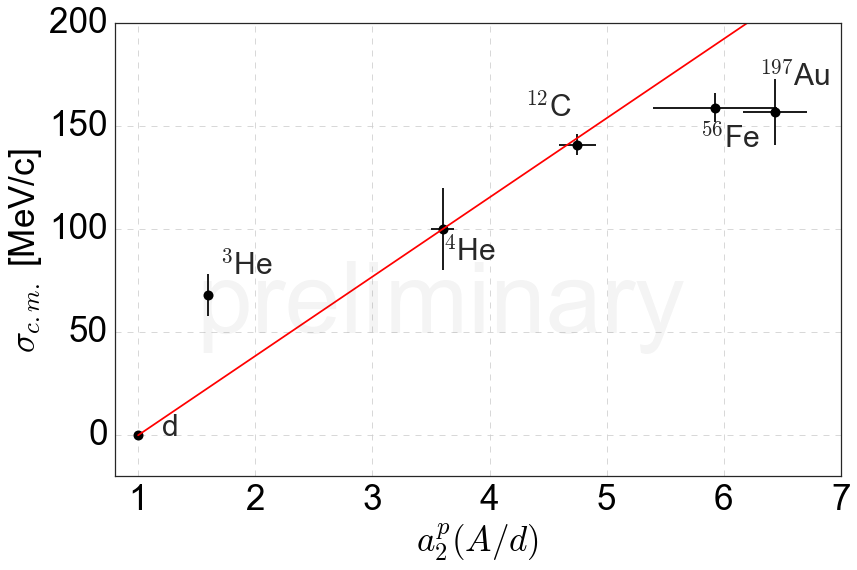

In [16]:
fig,ax=plt.subplots(figsize=(12,8))
x = np.array(a2_df['$a_2^p$'])
xerr = np.array(a2_df[r'$\Delta a_2^p$'])
y = np.array(a2_df[r'$\sigma$ [MeV/c]'])
yerr = np.array(a2_df[r'$\Delta \sigma$ [MeV/c]'])
plt.errorbar(x,y,xerr=xerr,yerr=yerr,fmt='o',color='black',markersize=10)#,label='data'


x = np.array(a2_df_onlyHe4['$a_2^p$'])
xerr = np.array(a2_df_onlyHe4[r'$\Delta a_2^p$'])
y = np.array(a2_df_onlyHe4[r'$\sigma$ [MeV/c]'])
yerr = np.array(a2_df_onlyHe4[r'$\Delta \sigma$ [MeV/c]'])
popt, v = curve_fit(linear_d_fixed, xdata=x, ydata=y,sigma=yerr, p0=[40])# fit data using SciPy's Levenberg-Marquart method            
print popt
slope , slope_err = popt , sqrt(v)
#p = np.poly1d(np.polyfit(x,y,deg=1))
x_fit = np.linspace(1,7,100)
plt.plot(x_fit,slope*(x_fit-1),'-',color='red')
set_axes(ax,'$a_2^p (A/d)$',r'$\sigma_{c.m.}$ [MeV/c]'
         ,xlim=(0.8,7),ylim=(-20,200),do_add_grid=True,fontsize=35)
fontsize = 30
plt.text(1.2,0,'d',fontsize=fontsize)
plt.text(1.7,78,'$^3$He',fontsize=fontsize)
plt.text(3.6,85,'$^4$He',fontsize=fontsize)
plt.text(4.3,155,'$^{12}$C',fontsize=fontsize)
plt.text(5.8,140,'$^{56}$Fe',fontsize=fontsize)
plt.text(6.3,170,'$^{197}$Au',fontsize=fontsize)
plt.text(1.5,50,'preliminary',fontsize=100,alpha=0.05)
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/Projects/2NSRC/ppCMpaper/Figures/a2_p_vs_sigma.pdf')

C12 sigma: 158 MeV/c
Al27 sigma: 181 MeV/c
Fe56 sigma: 179 MeV/c
Pb208 sigma: 196 MeV/c


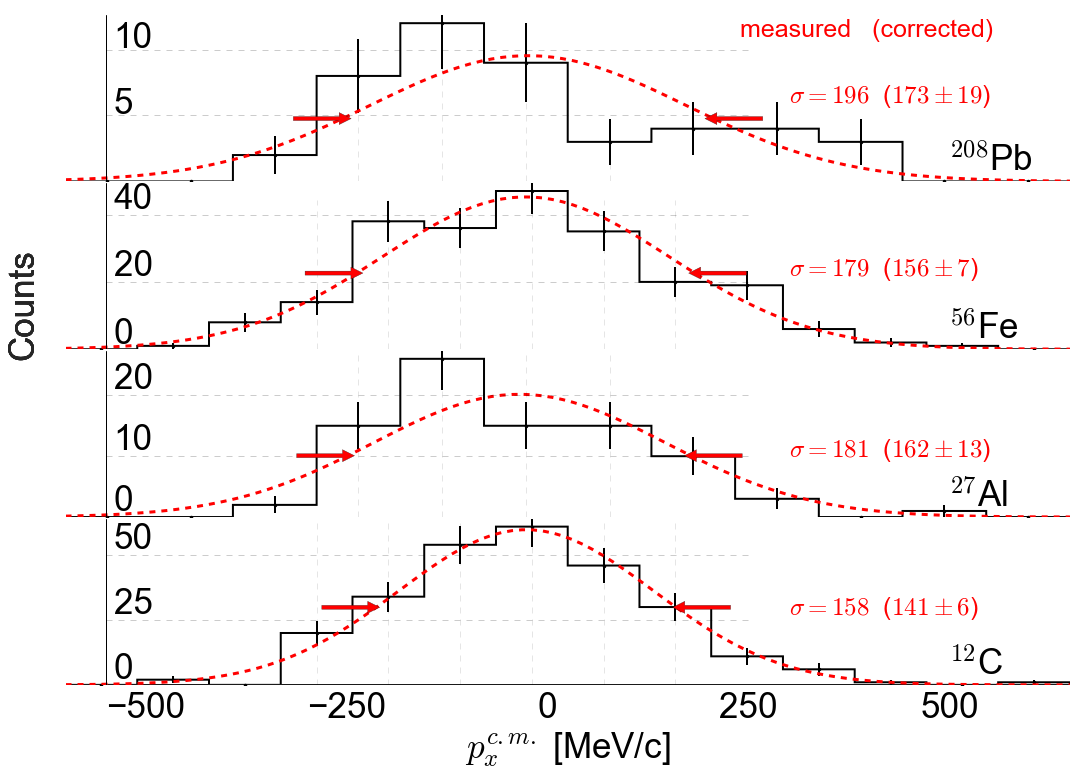

In [6]:
# make p(c.m.) in a nice style using also keyone
xmin , xmax  = -600,650
fontsize = 35
gauscolor = 'red'
figsize=(18,12)
fig = plt.figure(figsize=figsize)
nbins = [15 , 13 , 15 , 13]
y_ticks_targets = [[0, 25, 50],[0, 10, 20],[0, 20, 40],[5, 10]]
y_text_sigma = [27,10,22,6]

for i,target,target_name,color,y_ticks in zip(range(4)
                                              ,targets,target_names
                                              ,['black','black','black','black'],y_ticks_targets):
    bins = np.linspace(xmin , xmax , nbins[i] )

    x = 1000*ana[target].pcmX #np.sqrt(0.5)*(ana[target].pcmX + ana[target].pcmY)
    x_label = '$p^{c.m.}_{x}$ [MeV/c]' if target is 'C12' else '' # = (p^{c.m.}_{x}+p^{c.m.}_{y})/2
#     x = 1000*np.sqrt(0.5)*(ana[target]['pcmX'] + ana[target]['pcmY'])
#     x_label = '$\\frac{1}{2}(p^{c.m.}_{x}+p^{c.m.}_{y})$ [MeV/c]' if target is 'C12' else '' 

    mean = np.average(x)
    sigma = np.sqrt(np.average(np.square(x-mean)))   
    ax = fig.add_subplot(4,1,4-i)
    h,bins,_=plt.hist(x,bins=bins,histtype='step',linewidth=2,color=color);
    mid = bins[0:-1] + 0.5*(bins[1]-bins[0])
    plt.errorbar( mid , y=h , yerr=np.sqrt(h) , fmt='.',linewidth=2 , color=color);
    C = np.max(h)

    mean = np.mean(x)
    sigma = np.std(x)
    print target,'sigma: %.0f MeV/c'%(sigma)
    x_gaus = np.linspace(np.min(bins),np.max(bins),100)
    norm_fact = len(x)*(bins[1]-bins[0])
    y_gaus = norm_fact*mlab.normpdf(x_gaus, mean, sigma)
    y_sigma = 0.5*np.max(y_gaus)
    plt.plot(x_gaus,y_gaus,'--',color=gauscolor,linewidth=3);
    ymax = 1.05*np.max(h)
    ax.set_ylim(0,ymax)
    if i==0: plt.axhspan(xmin=-1,xmax=1,ymin=0,ymax=0,linewidth=3)
    else:
        ax.xaxis.set_major_formatter( NullFormatter() )
        ax.set_axis_off()
    plt.text(xmax-150 , 0.07*np.max(h) , target_name , color=color , fontsize=35)
    ax.set_xlim(xmin , xmax)
    plt.xticks(np.linspace(xmin + 200 , xmax - 200 , 5))
    set_axes(ax,x_label=x_label,fontsize=35)
    plt.subplots_adjust(hspace=0.01)
    # add grid lines
    for j,tick in zip(range(len(mid)),mid):
        if j < 3 or j > nbins[i]-7: continue 
        if i==2  :  y_max = 0.9*ymax # h[j]
        elif i==3:  y_max = h[j]
        else: y_max = ymax
        line = plt.Line2D([tick,tick],[0,y_max],linewidth=1,linestyle='--',color='black',alpha=0.1)
        ax.add_artist(line)
    # add x-axis to the bottom subplot (12C)
    if i==0:
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('none')
        ax.tick_params(labeltop='off', labelleft='off')
        customaxis(ax,c_left='none',c_bottom='none')
    # add vertical axes
    x_yaxis = -550 # xmin + 167.5*(xmax-xmin)*(1-0.2*i*0)
    line = plt.Line2D([x_yaxis,x_yaxis],[0,ymax],linewidth=1,linestyle='-',color=color)
    ax.add_artist(line)
    for y_tick in y_ticks: 
        ax.text(x_yaxis+10,y_tick+0.04*y_max,'%d'%y_tick,fontsize=fontsize,color=color)
        line = plt.Line2D([x_yaxis,-x_yaxis-300],[y_tick,y_tick],linewidth=1,linestyle='--',color=color,alpha=0.2)
        ax.add_artist(line)

    # add sigma lines and text
    # s_t_final , s_t_final_Err = float(AccCorr[AccCorr.index==target_name]['s_t_final']),float(AccCorr[AccCorr.index==target_name]['s_t_final_Err'])
    s_t_final , s_t_final_Err = float(AccCorr[AccCorr.index==target_name]['s_x_corrected']),float(AccCorr[AccCorr.index==target_name]['s_x_corrected_Err'])


    x_text = xmax - 350 # mean+sigma+110
    #y_text = y_sigma+3 if i!=1 else y_sigma-2
    if target is 'Pb208': plt.text( x_text-60 , y_text_sigma[i]+5,'measured   (corrected)',color=gauscolor,fontsize=25)
    plt.text(x_text, y_text_sigma[i],'$\\sigma=%.0f $  ($%.0f \pm %.0f $)'%(sigma , s_t_final , s_t_final_Err),color=gauscolor,fontsize=25)
    ax.annotate('', xy=(mean+sigma+20, y_sigma), xytext=(mean+sigma+100, y_sigma),arrowprops=dict(facecolor=gauscolor, shrink=0.05))
    ax.annotate('', xy=(mean-sigma-20, y_sigma), xytext=(mean-sigma-100, y_sigma),arrowprops=dict(facecolor=gauscolor, shrink=0.05))
    plt.xticks([-500, -250, 0, 250, 500])
    plt.figtext(0.08,0.6,"Counts",fontdict={'fontsize':fontsize},rotation=90)
    # plt.tight_layout()
    plt.savefig('/Users/erezcohen/Desktop/Projects/2NSRC/ppCMpaper/Figures/pcm_alltargets_nocolors.png',transparent=True) 